In [2]:
!gdown --id 1acnZbo5FCr9vRQEGgWkSfgEqM7AkoKQz

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1acnZbo5FCr9vRQEGgWkSfgEqM7AkoKQz
To: /content/kaggle.json
100% 65.0/65.0 [00:00<00:00, 215kB/s]


In [3]:
!mkdir -p ~/.kaggle

In [4]:
!mv kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d thedevastator/predicting-credit-card-customer-attrition-with-m

Dataset URL: https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m
License(s): CC0-1.0
  0% 0.00/379k [00:00<?, ?B/s]
100% 379k/379k [00:00<00:00, 182MB/s]


In [7]:
!unzip predicting-credit-card-customer-attrition-with-m.zip

Archive:  predicting-credit-card-customer-attrition-with-m.zip
  inflating: BankChurners.csv        


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,PolynomialFeatures,MinMaxScaler
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss,accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB

In [9]:
data = pd.read_csv('BankChurners.csv')

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

### 1. How many rows and columns are in the dataset?

In [ ]:
data.shape

(10127, 23)

### 2. How many missing values exist?

In [ ]:
data.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


### 3. Are there any duplicate values?

In [ ]:
data.duplicated().sum()

np.int64(0)

### 4. Identify and remove unnecessary or irrelevant columns.

In [ ]:
data.drop(columns=['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1,inplace=True)

In [ ]:
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

### 5. Which Numeric features have the strongest correlation with Attrition_Flag Column?

In [ ]:
data['encoding'] = pd.get_dummies(data['Attrition_Flag'],drop_first=True)

In [ ]:
data['enco'] = data['encoding'].astype(int)

In [ ]:
data['enco'].value_counts()

,count
enco,
1,8500
0,1627


In [ ]:
target = 'enco'

In [ ]:
num = data.select_dtypes(include=['number'])
num.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
       'enco'],
      dtype='object')

In [ ]:
corr = num.corr()[target].sort_values(ascending=False)

In [ ]:
corr

,enco
enco,1.000000
Total_Trans_Ct,0.371403
Total_Ct_Chng_Q4_Q1,0.290054
Total_Revolving_Bal,0.263053
Avg_Utilization_Ratio,0.178410
Total_Trans_Amt,0.168598
Total_Relationship_Count,0.150005
Total_Amt_Chng_Q4_Q1,0.131063
Credit_Limit,0.023873
Avg_Open_To_Buy,0.000285


### 6. What is the age distribution of attrited customers?

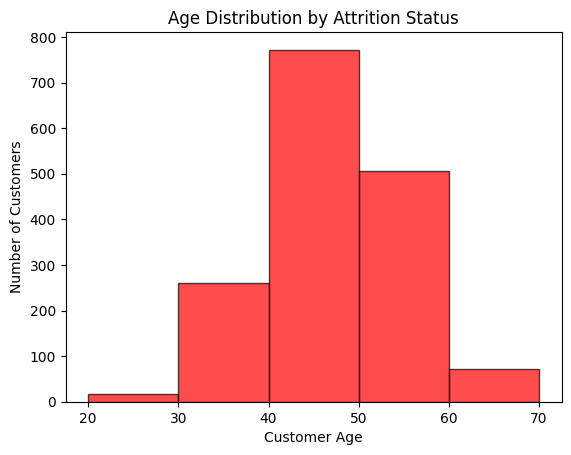

In [22]:
attrited_age = data[data['Attrition_Flag'] == 'Attrited Customer']['Customer_Age']
plt.hist(attrited_age,bins=[20,30,40,50,60,70],alpha=0.7,label='Attrited Customer',edgecolor='black',color='red')
plt.xlabel('Customer Age')
plt.ylabel('Number of Customers')
plt.title('Age Distribution by Attrition Status')
plt.show()


### 7. In which months are customers most frequently inactive?

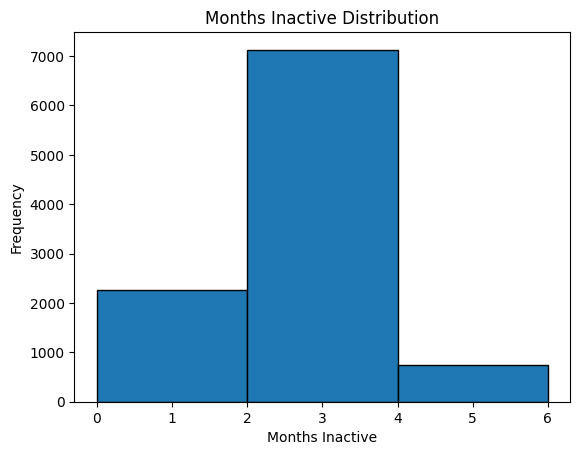

In [ ]:
plt.hist(data['Months_Inactive_12_mon'],bins=[0,2,4,6],edgecolor='black')
plt.xlabel('Months Inactive')
plt.ylabel('Frequency')
plt.title('Months Inactive Distribution')
plt.show()

### 8. What percentage of customers have churned?

In [ ]:
data['Attrition_Flag'].value_counts(normalize=True)*100

,proportion
Attrition_Flag,
Existing Customer,83.934038
Attrited Customer,16.065962


### 9. Do customers with fewer transactions leave more?

In [ ]:
data.groupby("Attrition_Flag")["Total_Trans_Ct"].mean()


,Total_Trans_Ct
Attrition_Flag,
Attrited Customer,44.933620
Existing Customer,68.672588


### 10. Is churn higher for customers with low transaction amount?

In [ ]:
data.groupby("Attrition_Flag")["Total_Trans_Amt"].median()


,Total_Trans_Amt
Attrition_Flag,
Attrited Customer,2329.0
Existing Customer,4100.0


### 11. Are churned customers more inactive AND low spenders?

In [ ]:
data.groupby("Attrition_Flag")[["Months_Inactive_12_mon", "Total_Trans_Amt"]].mean()


,Months_Inactive_12_mon,Total_Trans_Amt
Attrition_Flag,,
Attrited Customer,2.693301,3095.025814
Existing Customer,2.273765,4654.655882


### 12. Do customers with zero inactivity almost never churn?

In [ ]:
data[data["Months_Inactive_12_mon"] == 0]["Attrition_Flag"].value_counts()


,count
Attrition_Flag,
Attrited Customer,15
Existing Customer,14


### 13. Do customers with long account history churn less?

In [ ]:
data.groupby("Attrition_Flag")["Months_on_book"].mean()


,Months_on_book
Attrition_Flag,
Attrited Customer,36.178242
Existing Customer,35.880588


### 14. Be prepare a columns for prediction.

In [ ]:
data.drop(columns=["Income_Category"], inplace=True)


In [ ]:
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
label = LabelEncoder()
data['Attrition_Flag'] = label.fit_transform(data['Attrition_Flag'])

In [ ]:
X = data.drop(columns=['Attrition_Flag'])
y = data['Attrition_Flag']

In [ ]:
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
Preprocessing = ColumnTransformer(
    transformers=[
        ('categorical',OneHotEncoder(),cat_cols),
        ('num_cols',StandardScaler(),num_cols)
    ]
)

In [ ]:
X_p = Preprocessing.fit_transform(X)

### Summary

--> The dataset contains 10,127 rows and 23 columns.

--> There are no missing values and no duplicate records.

--> About 16% of customers have churned, while the rest are still active.

--> Most customers are in the 40–50 age group are churned and Customers are most often inactive for 2 to 4 months in a year.

--> Some columns show a small relationship with churn like Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal,Avg_Utilization_Ratio

--> Customers who left the bank spent much less money on average and who stayed spent almost double the amount.

--> The average account age is almost the same for churned and existing customers.

### Machine Learning Models

### 1. Build a Simple Linear Regression model to predict the Sale price of the house.Use Area as the independent variable

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_p,y,test_size=0.2)

In [ ]:
lrm = LinearRegression()

In [ ]:
lrm.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lrm.predict(X_test)

In [ ]:
loss_logi=log_loss(y_test, y_pred)

In [ ]:
loss_logi

0.3135532910794328

###2. Build Naive Bayes model which will predict whether a customer is at risk to churn from the platform.

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_predg = gnb.predict(X_test)
acc_g = accuracy_score(y_test, y_predg)

In [ ]:
acc_g

0.8879565646594274

###3. Build a K-nearest classifier which will predict whether a customer is at risk to churn from the platform.

In [ ]:
kn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
kn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_k = kn.predict(X_test)

In [ ]:
acc_k = accuracy_score(y_test,y_k)

In [ ]:
acc_k

0.9160908193484699

###4.  Find optimal parameters for the algorithm through GridSearchCV and build SVC model which will predict whether a customer is at risk to churn from the platform.


In [ ]:
sv = SVC()

In [ ]:
param_s = {
    'kernel':['rbf','linear'],
    'C':[0.5,1,5,10],
    'gamma':['scale','auto']
}

In [ ]:
grid_s = GridSearchCV(
    sv,param_s,scoring='accuracy',cv=5,n_jobs=-1
)

In [ ]:
grid_s.fit(X_train,y_train)
print(grid_s.best_params_)

{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
svc =SVC(kernel='rbf',gamma='scale',C=5)

In [ ]:
svc.fit(X_train,y_train)

SVC(C=5)

In [ ]:
y_predss=svc.predict(X_test)

In [ ]:
acc_svc = accuracy_score(y_test,y_predss)

In [ ]:
acc_svc

0.9452122408687068

###5. Find optimal parameters for the algorithm through GridSearchCV and build a Decision tree which will predict whether a customer is at risk to churn from the platform.

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
param_dt = {
    'max_depth': [10, 20, 30, None],'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini','entropy']
}

In [ ]:
grid_tree = GridSearchCV(dt,param_dt,cv=5,scoring="accuracy",n_jobs=-1)

In [ ]:
grid_tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
print(grid_tree.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth= 10,max_features=None,min_samples_leaf= 2,min_samples_split= 5)

In [ ]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=5)

In [ ]:
y_predd=dtc.predict(X_test)

In [ ]:
acc_dtc=accuracy_score(y_test,y_predd)

In [ ]:
acc_dtc

0.9452122408687068

###6. Find optimal parameters for the algorithm through RandomSearchCV and build a Random which will predict whether a customer is at risk to churn from the platform.

In [ ]:
rf = RandomForestClassifier()

In [ ]:
param_rfc = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
}

In [ ]:

random_search = RandomizedSearchCV(rf,param_rfc,n_iter=10,cv=2,scoring='accuracy',n_jobs=-1)


In [ ]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 150, 200, 250]},
                   scoring='accuracy')

In [ ]:
print(random_search.best_params_)

{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 30}


In [ ]:
rfc = RandomForestClassifier(n_estimators=200,min_samples_split=10,min_samples_leaf=1,max_features=None,max_depth=30)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, max_features=None, min_samples_split=10,
                       n_estimators=200)

In [ ]:
y_predrf= rfc.predict(X_test)

In [ ]:
acc_rfc = accuracy_score(y_test,y_predrf)

In [ ]:
acc_rfc

0.9545903257650543

###7. Model Selection: Evaluate and compare performance of all the models to find the best model.

In [ ]:
models = {
    'Naive Bayes model':acc_g,
    'K-nearest classifier ':acc_k,
    'Support Vector Classification Model':acc_svc,
    'Decision Tree Classification Model':acc_dtc,
    'Random Forest Classification Model':acc_rfc
}

In [ ]:
model_names = list(models.keys())
scores = list(models.values())

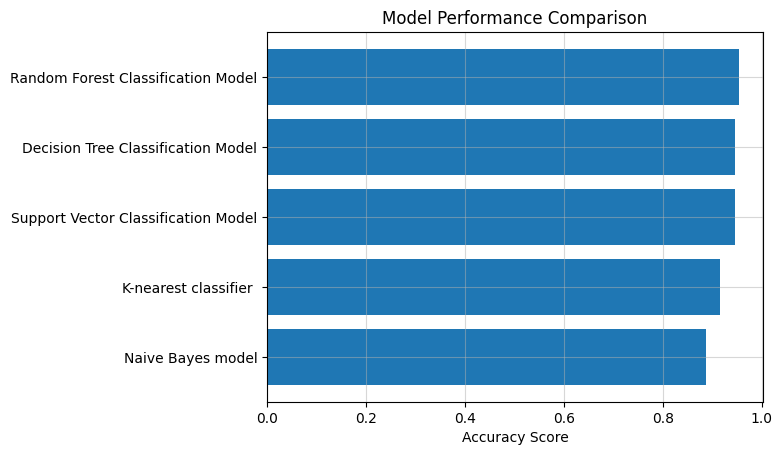

In [ ]:
plt.barh(model_names,scores)
plt.xlabel('Accuracy Score')
plt.title('Model Performance Comparison')
plt.grid(alpha=0.5)
plt.show()

In [ ]:
best_model = max(models,key=models.get)

In [ ]:
print(best_model,models[best_model])

Random Forest Classification Model 0.9545903257650543


###--> The Random Forest classifier performed best, with an accuracy of 95 percent after tuning its hyperparameters using RandomizedSearchCV.